<a href="https://colab.research.google.com/github/SakshamVerma0099/CV_data/blob/main/BRAIN_TUMOR_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BRAIN TUMOR MODEL DETECTION SYSTEM USING THE FOLLOWING :

1) LANGUAGE USED -PYTHON .

2) MACHINE LEARNING AND DEEP LEARNING ALGORITHMS .

In [1]:
from google.colab import files

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the required modules used in the project.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Collecting  / Moduling  Data from Dataset .



In [10]:
import os
path = os.listdir('/content/drive/MyDrive/brain_tumor/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

Appending python lists for image and output image .

In [11]:
import cv2
X = []      #making lists for input image
Y = []      #making lists for output image
for cls in classes:
    pth = '/content/drive/MyDrive/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)            #for gray or 2D scale images
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
np.unique(Y)                #for checking the 2 classes

array([0, 1])

To check how many images are having positive tumor and how many with negative tumor .

In [14]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [15]:
X.shape,                      #for checking the shape of the sample (images)

((1222, 200, 200),)

Visualizing the input image

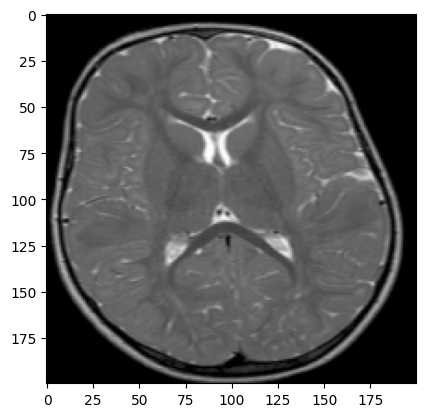

In [16]:
plt.imshow(X[0], cmap='gray')

Traning data and converting image into 2D for sklearn .


Calculation the shape of the module (rows*columns)



In [17]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

SPLITTING AND TRAINING  THE DATA

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)
xtrain.shape, xtest.shape


((977, 40000), (245, 40000))

FEATURE SCALING OF THE DATA


In [19]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


MODEL TRAINING

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [21]:
import warnings
warnings.filterwarnings('ignore')               #To ignore unwanted warnings

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [22]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

EVALUATION OF DATA MODEL

1) FOR LOGISTIC REGRESSION

2) FOR SVM MODEL

In [23]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [24]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9979529170931423
Testing Score: 0.9551020408163265


PERDICTION OF THE DATA

In [25]:
pred = sv.predict(xtest)

In [26]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  5,  48,  49,  81,  90, 127, 138, 160, 165, 217, 236]),)

In [27]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  11
1 1


TESTING OF THE MODEL

In [28]:
#creating dictionary to decode the misclassified samples .
dec = {0:'No Tumor', 1:'Positive Tumor'}

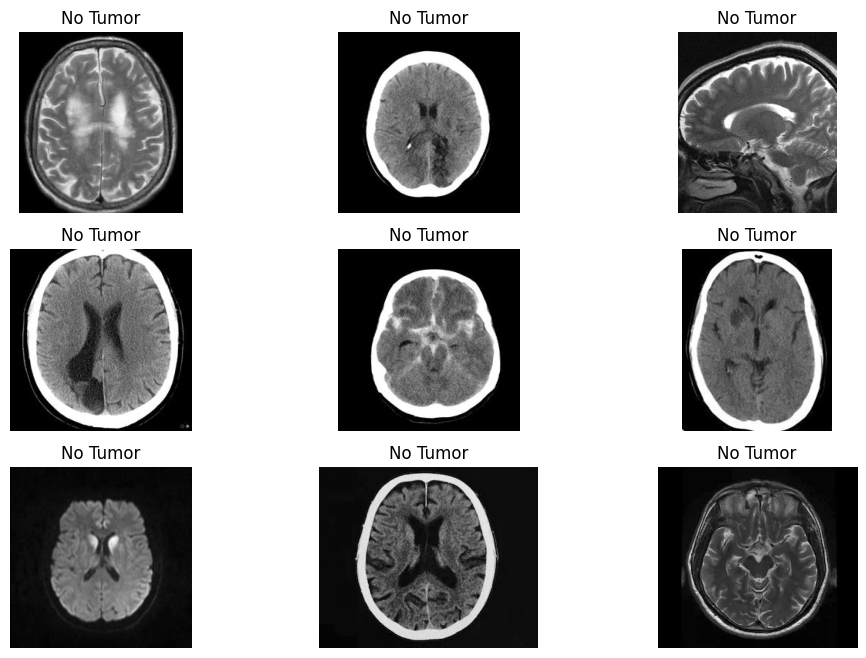

In [29]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/no_tumor')[:9]:
    plt.subplot(3,3,c)          #for 9 images

    img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

WE GOT 100% ACCURACY IN MODEL TESTING OF NO TUMOR MODEL .

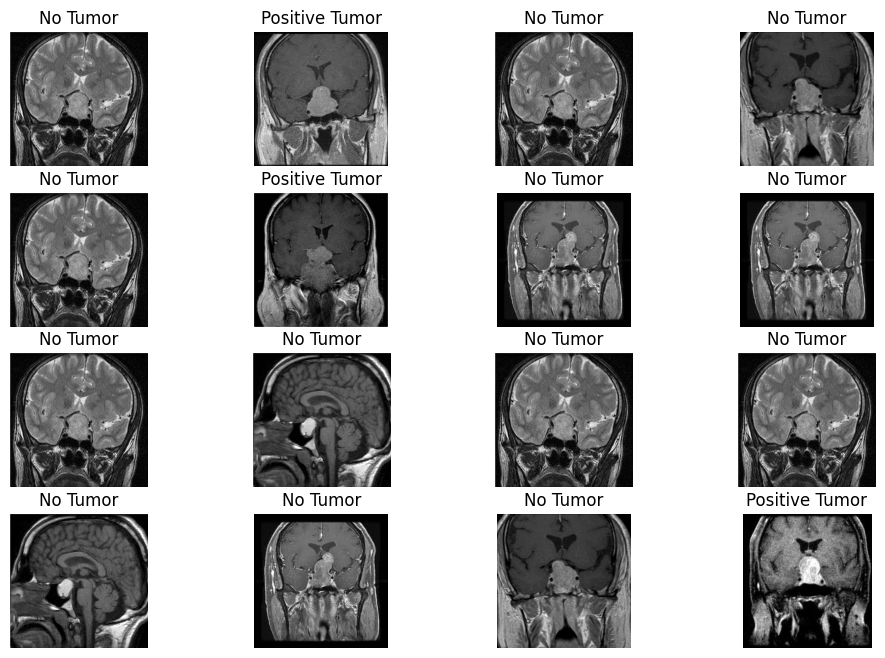

In [30]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)                #for 16 images

    img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

HOWEVER WE DIDN'T GET 100% ACCURACY IN PITUAITARY MODEL OF TESTING DATA

WE GOT APPROXIMATELY 90-95% OF ACCURACY IN IT .